In [0]:
%matplotlib inline
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import os

In [3]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cd "/content/drive/My Drive/autoencoder-training"
  image_path = os.getcwd() + "/data"

else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"

Mounted at /content/drive
/content/drive/My Drive/autoencoder-training


# Cifar10 Classification
This notebook is going to test the accuracy of the pretrained resnet50 on the cifar10 dataset and how high an accuracy can be achieved by fine-tuning the model. This may be important when comparing the accuracy of the autoencoder at a later data.

Fastai will be used for this due to the ease of use of setting up a pretrained resnet50.

### Data Imports

In [0]:
data = ImageDataBunch.from_folder(image_path, size=32,ds_tfms=get_transforms(), bs = 128
                                 ).normalize(imagenet_stats)

In [6]:
len(data.train_ds), len(data.valid_ds)

(50000, 10000)

### Training

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.save("initial_learner") #save this so that this can be loaded with a smaller dataset instead of uploading with google colab each time

In [0]:
learn = learn.load('initial_learner')

In [9]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 2.29E-03


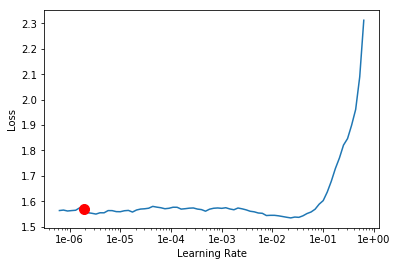

In [0]:
learn.recorder.plot(suggestion = True)

In [0]:
learn.fit_one_cycle(10, max_lr = 1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,1.187063,1.065515,0.367500,07:10
1,1.019465,1.024104,0.345100,24:07
2,0.929042,0.840313,0.296600,15:55
3,0.874274,0.842876,0.292100,1:25:21
4,0.805441,0.833252,0.284300,3:58:01
5,0.758702,0.716300,0.250300,06:59
